### Kmean - Algorithm

1. Random Centriods
2. Label data points
3. Recalculate the new centriods

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data.shape

(150, 6)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
# get X data - all 4 input X, no y because this is unsupervised learning

X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


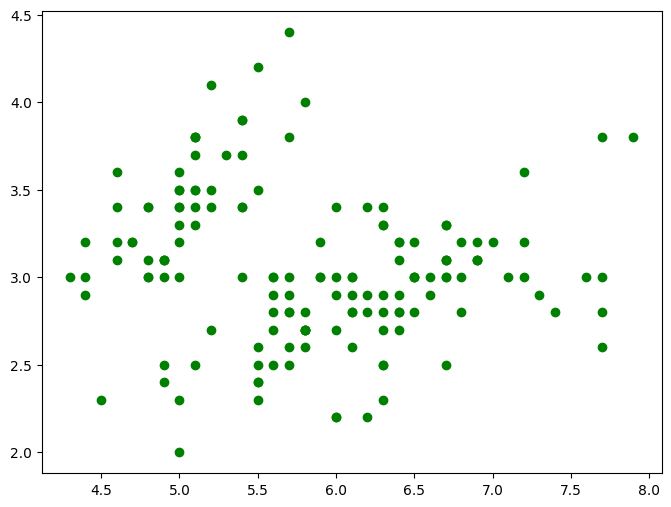

In [16]:
plt.figure(figsize = (8, 6))

plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'], color = 'green')

Text(0.5, 1.0, 'Sepal Length and Width (cm)')

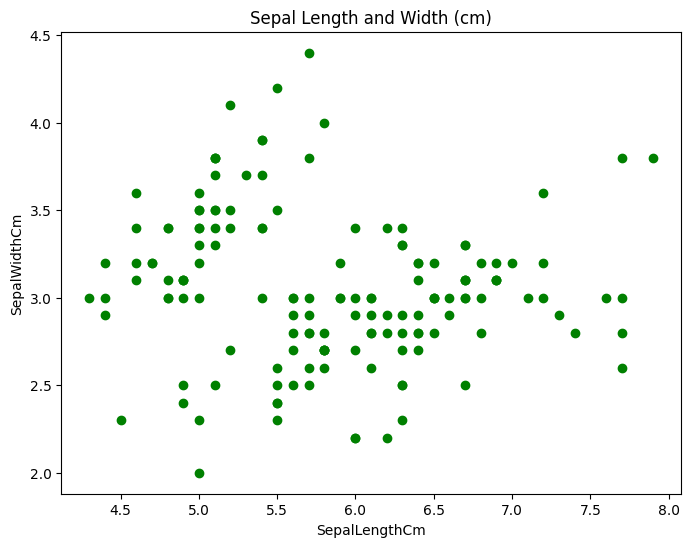

In [17]:
plt.figure(figsize = (8, 6))

plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'], color = 'green')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Sepal Length and Width (cm)')

Text(0.5, 1.0, 'Petal Length and Width (cm)')

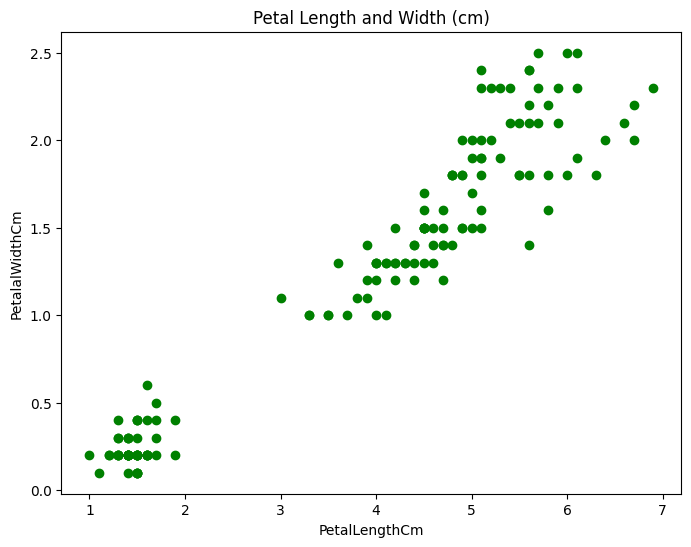

In [18]:
plt.figure(figsize = (8, 6))

plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], color = 'green')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalalWidthCm')
plt.title('Petal Length and Width (cm)')

In [23]:
# prepare a function for distance between 2 points

def distance_fn(a, b, ax = 1):
    return np.linalg.norm(a-b, axis = ax) # Euclidean distance

In [20]:
# test a function

a = np.array([10, 15])
b = np.array([4, 7])

In [21]:
from scipy.spatial import distance

In [22]:
distance.euclidean(a, b) # library function

10.0

In [25]:
distance_fn(a, b, None) # as we already defined ax, so we don't put it here again, just use None

10.0

### Round 1

In [27]:
K = 3 # there are 3 groups
X = np.array(X)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
C_x = np.random.randint(np.min(X[:, 2]), np.max(X[:, 2]), size = K)
C_x

array([2, 4, 3])

In [29]:
C_y = np.random.randint(np.min(X[:, 3]), np.max(X[:, 3]), size = K)
C_y

array([0, 1, 1])

In [32]:
# Centriods

C = np.zeros((3, 2))
C

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [33]:
C_old = np.zeros(C.shape)
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [35]:
C[:, 0] = C_x 
C[:, 1] = C_y 
C

array([[2., 0.],
       [4., 1.],
       [3., 1.]])